<a href="https://colab.research.google.com/github/rajkorde/aispikes/blob/main/training/colpali_rag/colpali_rag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers --upgrade
!pip install colpali-engine --upgrade
!apt-get install poppler-utils
!pip install pdf2image
!pip install openai
!pip install qwen_vl_utils
!pip install

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 52.2 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.50.0
    Uninstalling transformers-4.50.0:
      Successfully uninstalled transformers-4.50.0
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 74.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.0 MB

In [2]:
from colpali_engine.models import ColQwen2, ColQwen2Processor
import torch
from torch.utils.data import DataLoader
from tqdm import tqdm
from PIL import Image

In [3]:
import torch
from PIL import Image

from colpali_engine.models import ColQwen2, ColQwen2Processor


model = ColQwen2.from_pretrained(
        "vidore/colqwen2-v0.1",
        torch_dtype=torch.bfloat16, # switch to float16 if gpu does not support it
        device_map="cuda:0",  # or "mps" if on Apple Silicon
    )
processor = ColQwen2Processor.from_pretrained("vidore/colqwen2-v0.1")
model = model.eval()
model

adapter_config.json:   0%|          | 0.00/728 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/56.5k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.85G [00:00<?, ?B/s]

`Qwen2VLRotaryEmbedding` can now be fully parameterized by passing the model config through the `config` argument. All other arguments will be removed in v4.46


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/220 [00:00<?, ?B/s]

adapter_model.safetensors:   0%|          | 0.00/74.0M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/619 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/4.30k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/392 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

ColQwen2(
  (visual): Qwen2VisionTransformerPretrainedModel(
    (patch_embed): PatchEmbed(
      (proj): Conv3d(3, 1280, kernel_size=(2, 14, 14), stride=(2, 14, 14), bias=False)
    )
    (rotary_pos_emb): VisionRotaryEmbedding()
    (blocks): ModuleList(
      (0-31): 32 x Qwen2VLVisionBlock(
        (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (attn): VisionSdpaAttention(
          (qkv): Linear(in_features=1280, out_features=3840, bias=True)
          (proj): Linear(in_features=1280, out_features=1280, bias=True)
        )
        (mlp): VisionMlp(
          (fc1): Linear(in_features=1280, out_features=5120, bias=True)
          (act): QuickGELUActivation()
          (fc2): Linear(in_features=5120, out_features=1280, bias=True)
        )
      )
    )
    (merger): PatchMerger(
      (ln_q): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
      (mlp): Sequential(
        (0): L

In [4]:

# convert all PDF pages to images
from pdf2image import convert_from_path
import base64
from io import BytesIO


images = convert_from_path('aws2.pdf')

base64_images = []
for i in range(len(images)):
    buffered = BytesIO()
    images[i].save(buffered, format="JPEG")
    base64_images.append(base64.b64encode(buffered.getvalue()).decode('utf-8'))

In [8]:

# Process the inputs by batches of 2 - modify it depending on your VRAM !
 # Run inference - docs
dataloader = DataLoader(
    dataset=images,
    batch_size=2,
    shuffle=False,
    collate_fn=lambda x: processor.process_images(x),
)

ds  = []
for batch_doc in tqdm(dataloader):
    with torch.no_grad():
        batch_doc = {k: v.to(model.device) for k, v in batch_doc.items()}
        embeddings_doc = model(**batch_doc)
    ds.extend(list(torch.unbind(embeddings_doc.to("cpu"))))

100%|██████████| 101/101 [18:06<00:00, 10.75s/it]


In [29]:
def get_results(query: str):
    batch_queries = processor.process_queries([query]).to(model.device)

    # Forward pass
    with torch.no_grad():
        query_embeddings = model(**batch_queries)

    scores = processor.score_multi_vector(query_embeddings, ds)
    # get top-5 scores
    return scores[0].topk(10).indices.tolist()

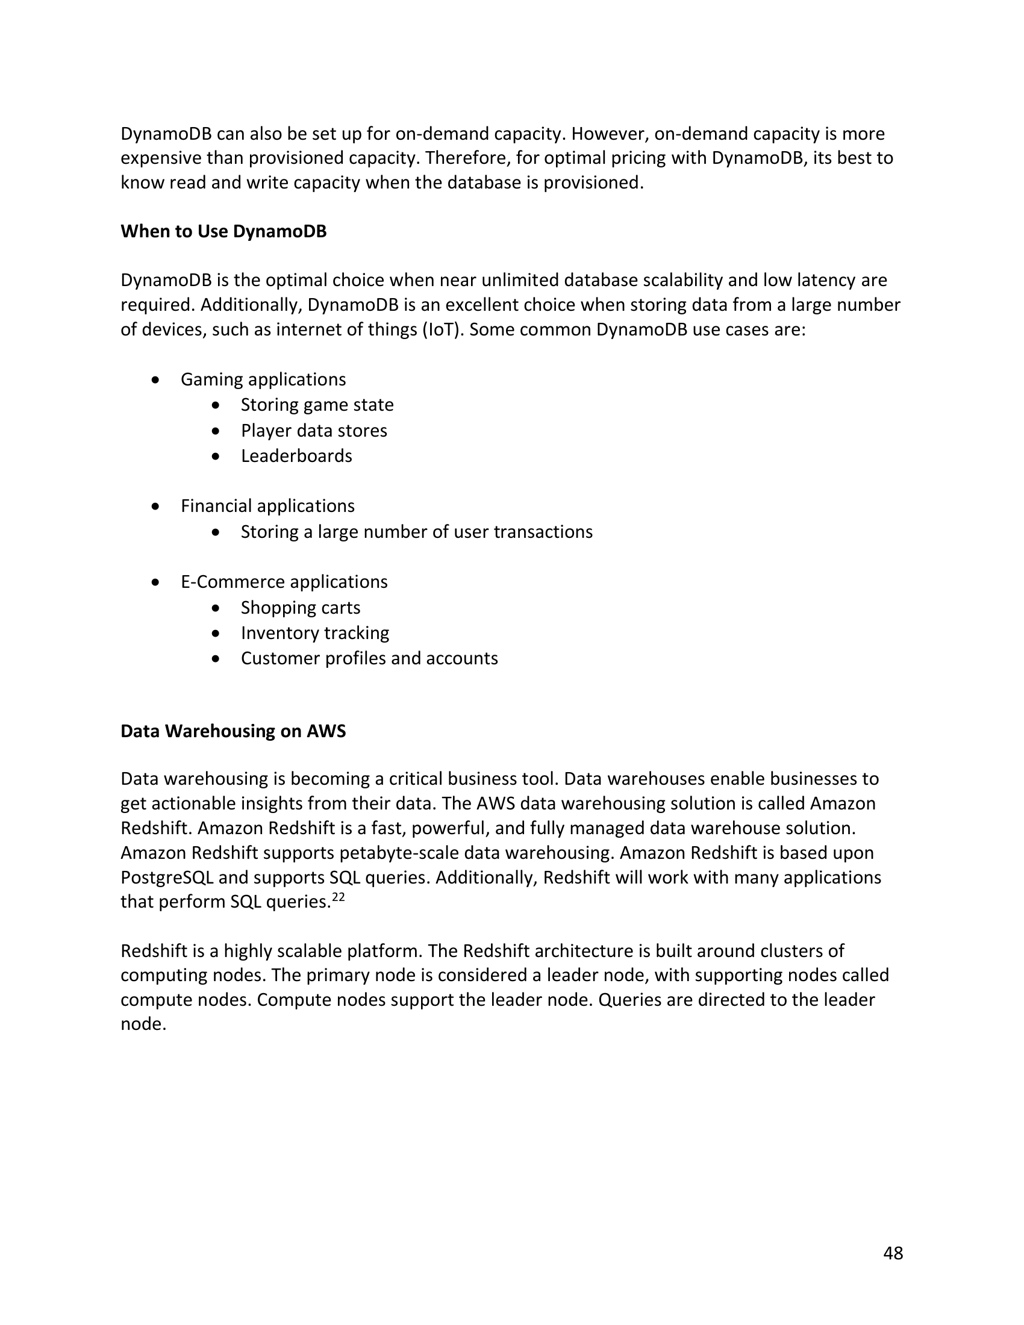

In [30]:
# display and resize keepin aspect ratio
idx = get_results("What is dynamodb?")[0]
im = images[idx]

def display_resize(im):
    shrink_factor = (im.size[0]/1024)
    display(im.resize((int(im.size[0]/shrink_factor), int(im.size[1]/shrink_factor))))

display_resize(im)

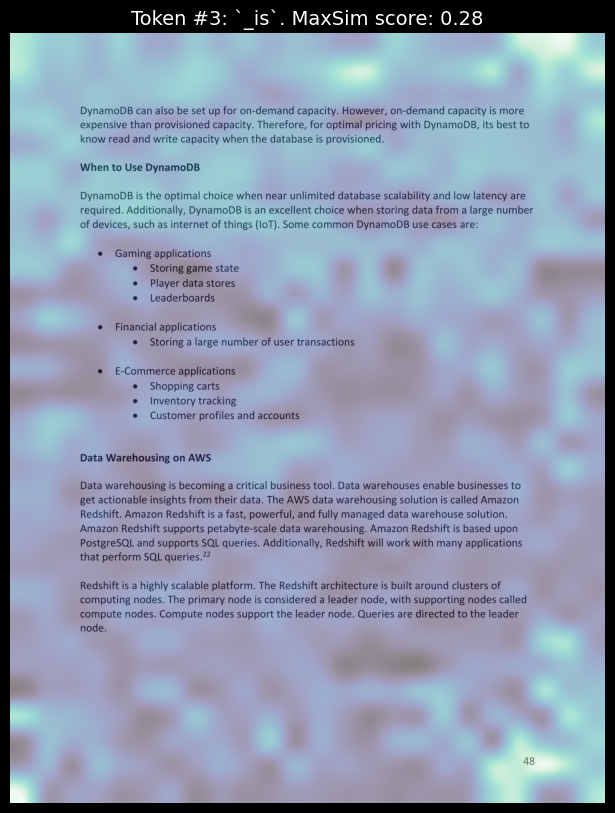

In [31]:
from colpali_engine.interpretability import (
    get_similarity_maps_from_embeddings,
    plot_all_similarity_maps,
    plot_similarity_map,
)


# Get the number of image patches
n_patches = processor.get_n_patches(
    image_size=im.size,
    patch_size=model.patch_size,
    spatial_merge_size=model.spatial_merge_size,
)


# Get the tensor mask to filter out the embeddings that are not related to the image
image_mask = processor.get_image_mask(processor.process_images([im]))

batch_queries = processor.process_queries(["What is dynamodb?"]).to(model.device)
# Generate the similarity maps
batched_similarity_maps = get_similarity_maps_from_embeddings(
    image_embeddings=ds[idx].unsqueeze(0).to("cuda"),
    query_embeddings=model(**batch_queries),
    n_patches=n_patches,
    image_mask=image_mask,
)

query_content = processor.decode(batch_queries.input_ids[0]).replace(processor.tokenizer.pad_token, "")
query_content = query_content.replace(processor.query_augmentation_token, "").strip()
query_tokens = processor.tokenizer.tokenize(query_content)

# Get the similarity map for our (only) input image
similarity_maps = batched_similarity_maps[0]  # (query_length, n_patches_x, n_patches_y)


token_idx = 3 # for the third token

fig, ax = plot_similarity_map(
    image=im,
    similarity_map=similarity_maps[token_idx],
    figsize=(8, 8),
    show_colorbar=False,
)

max_sim_score = similarity_maps[token_idx, :, :].max().item()
ax.set_title(f"Token #{token_idx}: `{query_tokens[token_idx].replace('Ġ', '_')}`. MaxSim score: {max_sim_score:.2f}", fontsize=14)

del query_content, query_tokens, batch_queries, batched_similarity_maps, similarity_maps, image_mask, n_patches, im


In [32]:
from transformers import Qwen2VLForConditionalGeneration, AutoTokenizer, AutoProcessor
from qwen_vl_utils import process_vision_info
import torch

# If you have more VRAM, feel free to use more powerful models !
gen_model = Qwen2VLForConditionalGeneration.from_pretrained("vidore/colqwen2-base",torch_dtype=torch.bfloat16).cuda().eval()

max_pixels = 512*28*28    # decrease resolution to fit in RAM at the cost of performance (if you have more RAM, feel free to up 512 to much higher)
gen_processor = AutoProcessor.from_pretrained("Qwen/Qwen2-VL-2B-Instruct", max_pixels=max_pixels)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [35]:
PROMPT = """
Use the page to answer the query:
{query}
PDF pages:
"""

def get_answer_local(query: str):
    top_k = get_results(query)

    messages = [
        {
            "role": "user",
            "content": [
                {
                    "type": "image",
                    "image": images[top_k[0]],
                },
                {"type": "text", "text": PROMPT.format(query=query)},
            ],
        }
    ]

    text = processor.apply_chat_template(
        messages, tokenize=False, add_generation_prompt=True
    )

    image_inputs, video_inputs = process_vision_info(messages)
    inputs = gen_processor(
        text=[text],
        images=image_inputs,
        videos=video_inputs,
        padding=True,
        return_tensors="pt",
    )
    inputs = inputs.to("cuda")

    generated_ids = gen_model.generate(**inputs, max_new_tokens=50)
    generated_ids_trimmed = [
        out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
    ]
    output_text = gen_processor.batch_decode(
        generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
    )
    return output_text, top_k


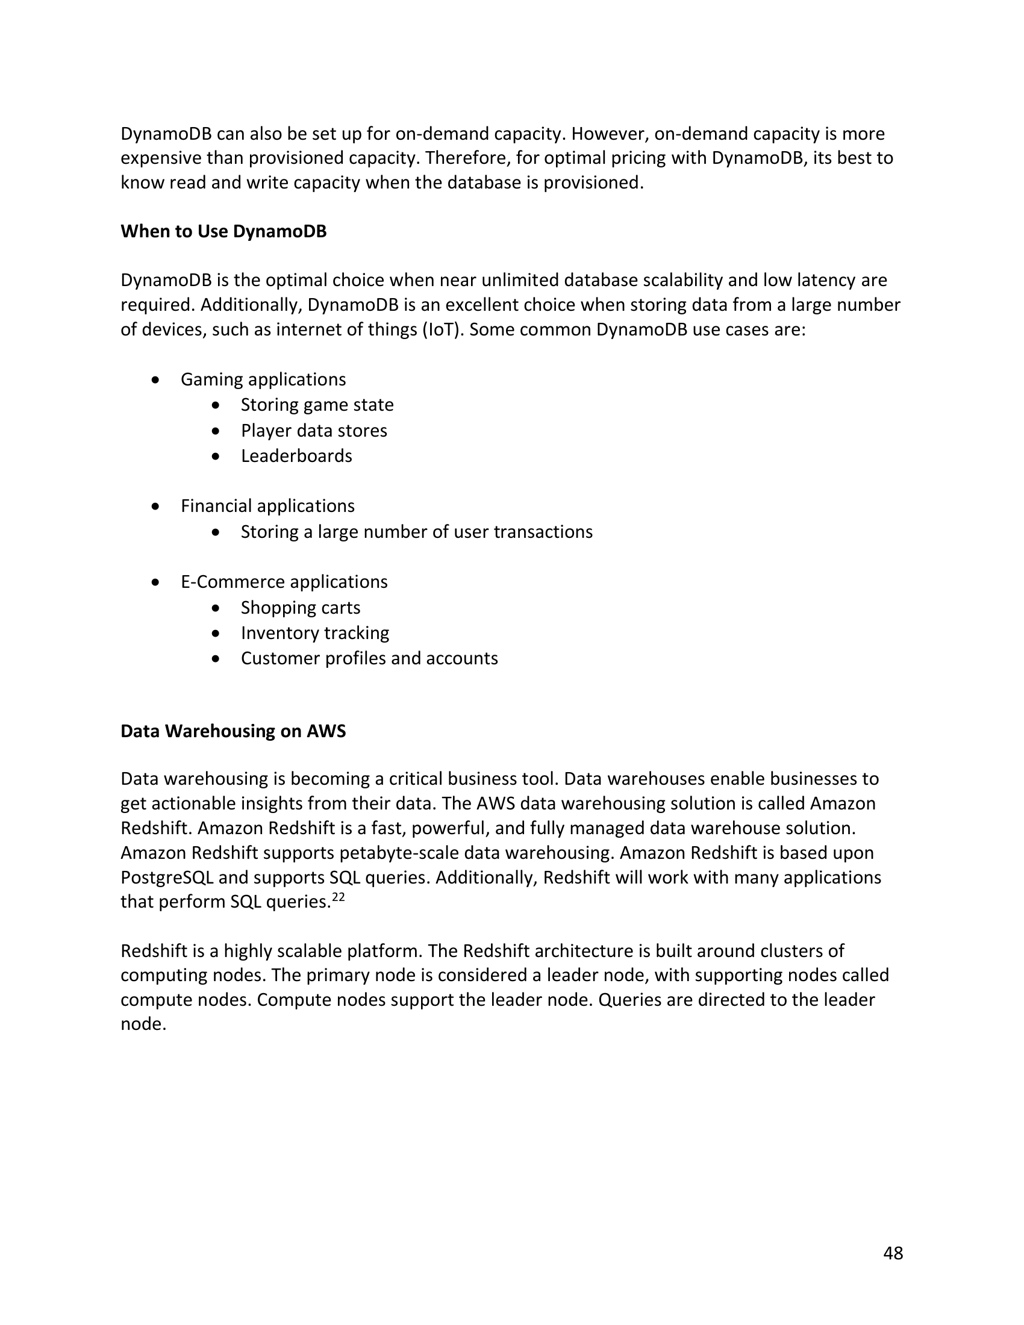

In [36]:
answer, top_k = get_answer_local("what is dynamodb?")

display_resize(images[top_k[0]])

In [37]:
print(answer[0])

DynamoDB is the optimal choice when near unlimited database scalability and low latency are required. Additionally, DynamoDB is an excellent choice when storing data from a large number of devices, such as internet of things (IoT). Some common DynamoDB use


In [38]:
from openai import OpenAI
import requests
from google.colab import userdata

# OpenAI API Key
api_key = userdata.get('OPENAI_API_KEY')

client = OpenAI(api_key=api_key)

PROMPT = """
You are a smart assistant designed to answer questions about a PDF document.
You are given relevant information in the form of PDF pages. Use them to construct a response to the question, and cite your sources.
If it is not possible to answer using the provided pages, do not attempt to provide an answer and simply say the answer is not present within the documents.
Give detailed and extensive answers, only containing info in the pages you are given.
Answer in the same language as the query.

Query: {query}
PDF pages:
"""

def get_answer_openai(query: str):
    top_k = get_results(query)

    response = client.chat.completions.create(
      model="gpt-4o-mini",
      messages=[
        {
          "role": "user",
          "content": [
            {
              "type": "text",
              "text": PROMPT.format(query=query)
            },
            {
              "type": "image_url",
              "image_url": {
                "url": f"data:image/jpeg;base64,{base64_images[top_k[0]]}"
                },
            },
            {
              "type": "image_url",
              "image_url": {
                "url": f"data:image/jpeg;base64,{base64_images[top_k[1]]}"
                },
            },
            {
              "type": "image_url",
              "image_url": {
                "url": f"data:image/jpeg;base64,{base64_images[top_k[2]]}"
                },
            },
            {
              "type": "image_url",
              "image_url": {
                "url": f"data:image/jpeg;base64,{base64_images[top_k[3]]}"
                },
            },
          ],
        }
      ],
      max_tokens=500,
    )
    return response.choices[0].message.content, top_k


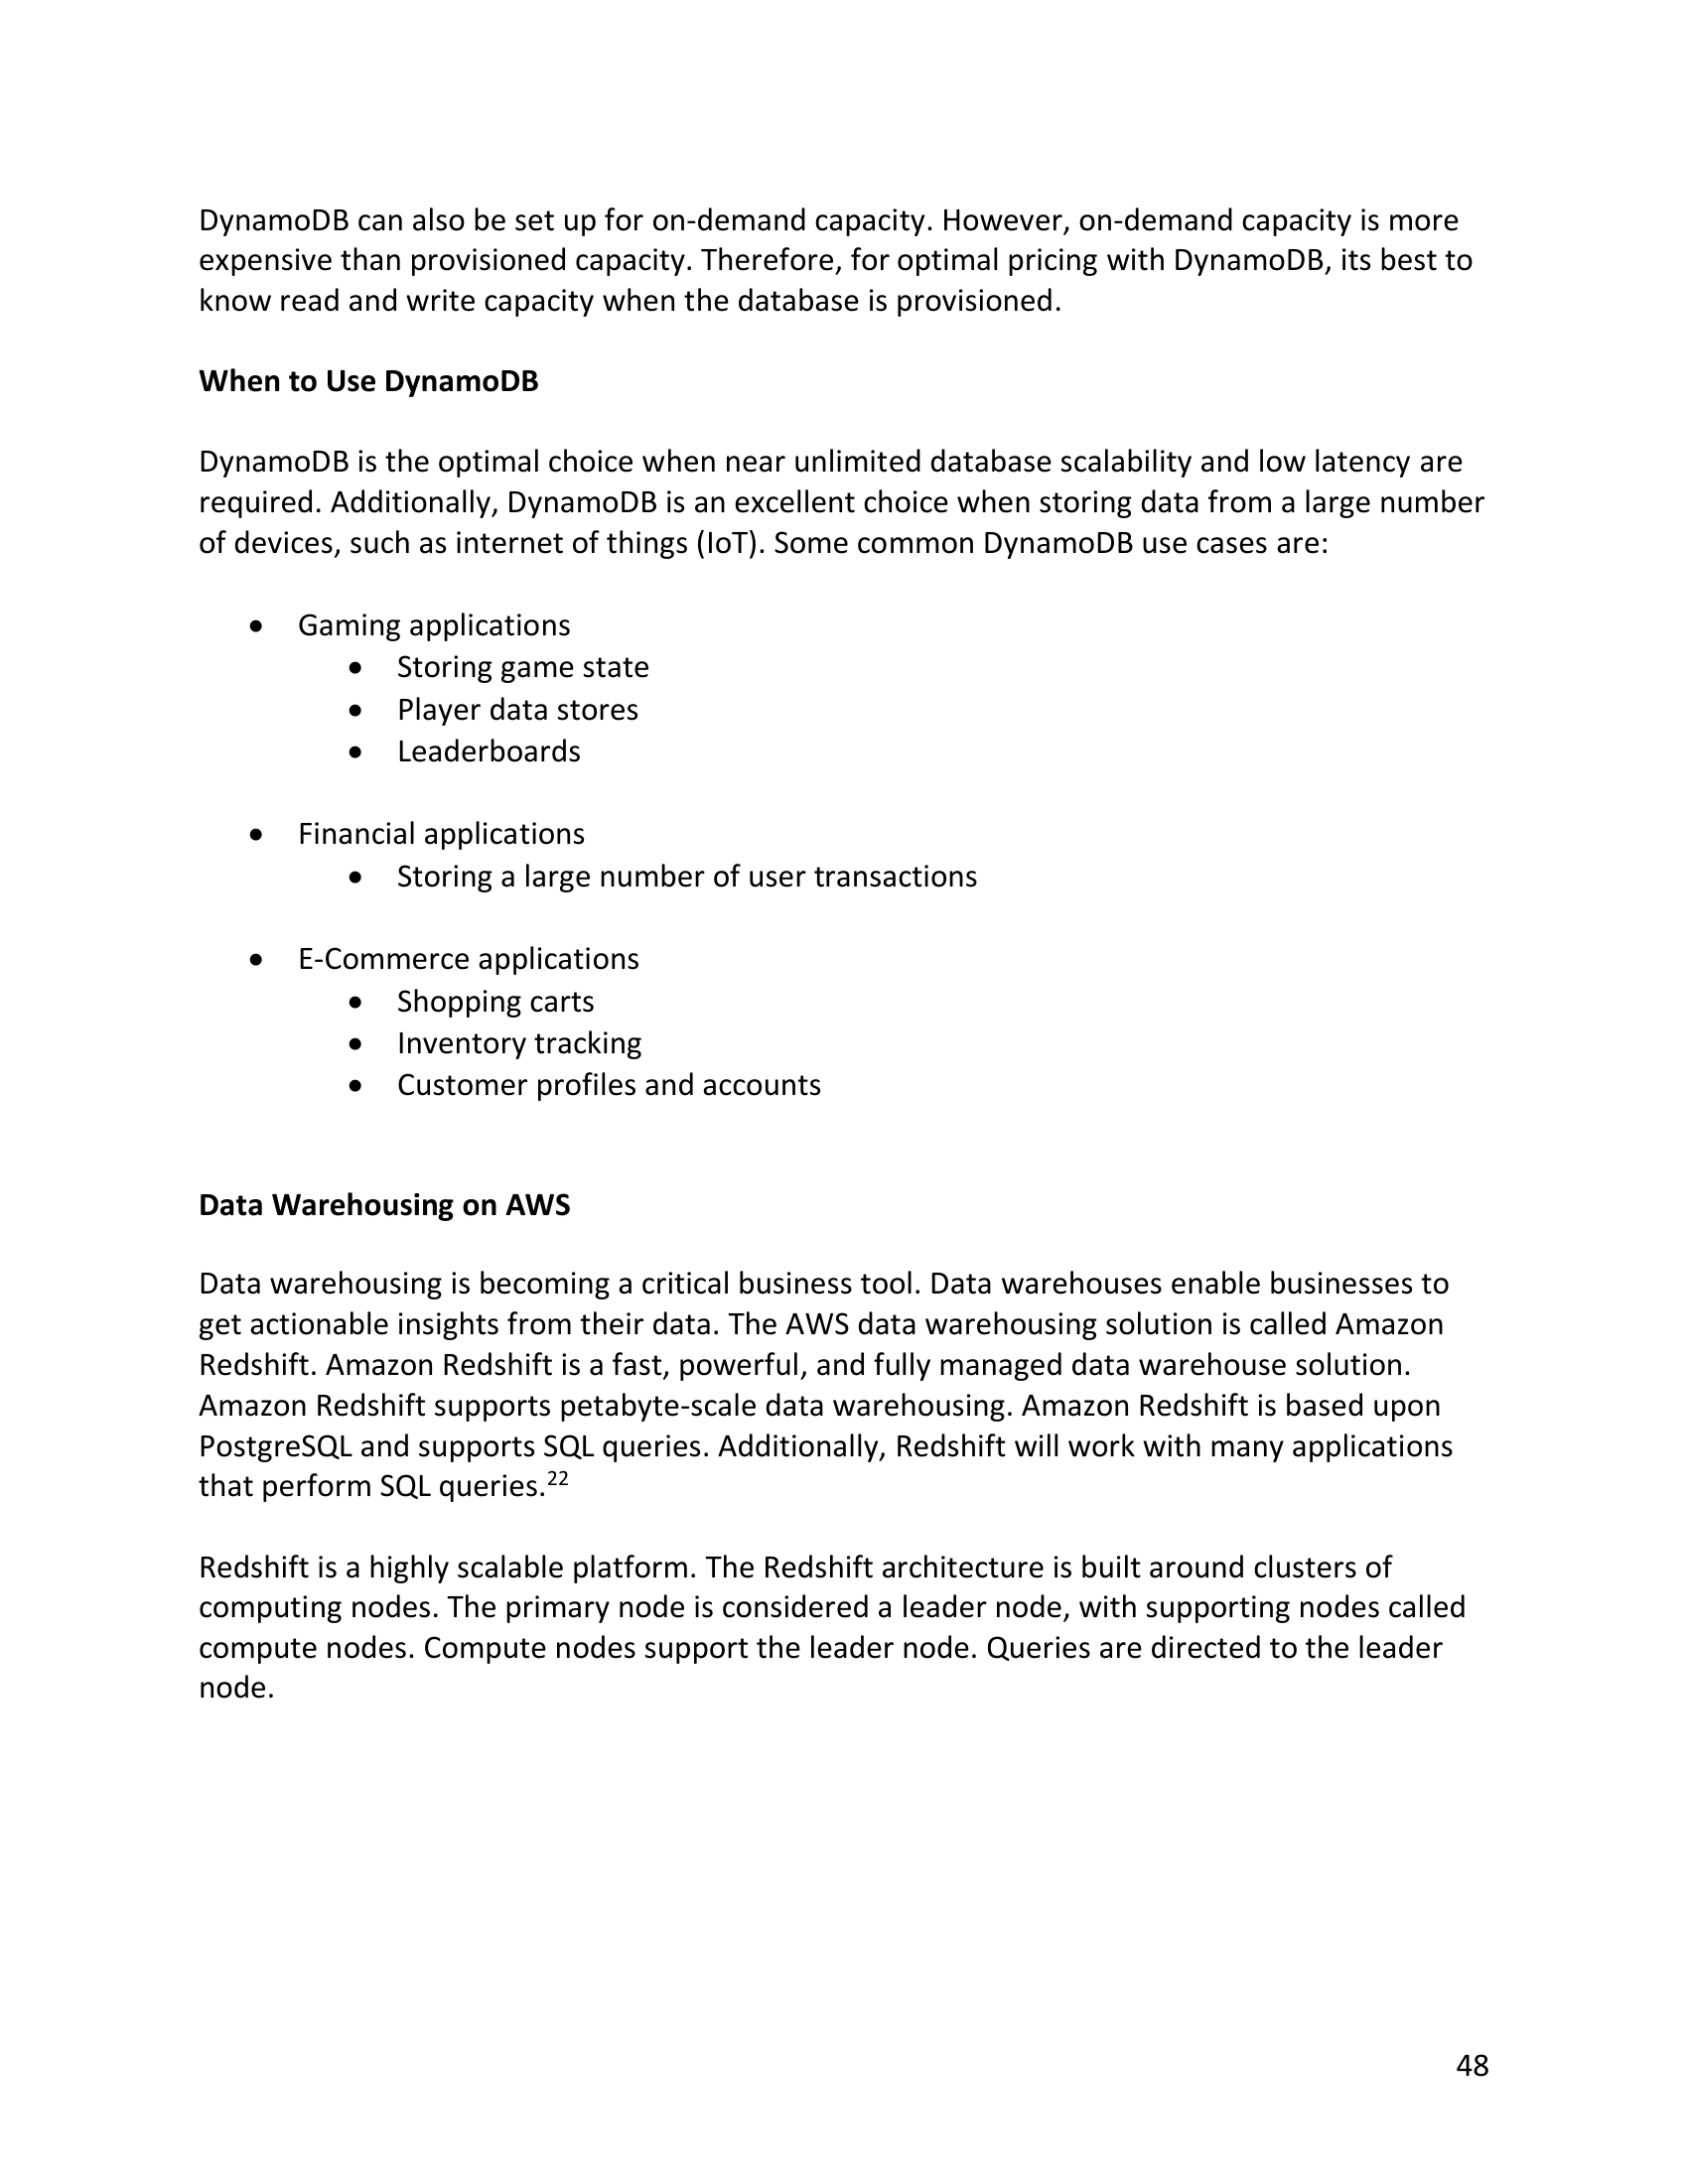

In [41]:
# run retrieval
answer, top_k = get_answer_openai("what is dynamodb?")

display(images[top_k[0]])

In [42]:
print(answer)

DynamoDB is a fully managed, high-availability NoSQL database service offered by AWS, designed to provide near unlimited scalability and flexibility beyond traditional relational databases. It is especially suitable for applications that require low latency and can handle large amounts of data.

### Key Features of DynamoDB

1. **Managed Service**: DynamoDB is fully managed by AWS, which reduces the management burden on organizations. This allows businesses to focus on application development rather than infrastructure.

2. **Scalability**: Because it is serverless, DynamoDB can scale horizontally without being limited by physical hardware constraints. This is beneficial in handling variable workloads, particularly for applications like IoT.

3. **Data Protection**: All data in DynamoDB is encrypted by default, ensuring a high level of security.

4. **Low Latency**: DynamoDB supports low latency for read and write operations, which is crucial for applications demanding quick responses.